### Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель
 LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [5]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(13)
memory usage: 38.7 KB


In [10]:
parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}



Object `sklearn.ensemble.RandomForestRegressor` not found.


In [14]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [19]:
X_train.shape



(354, 13)

In [18]:
y_train.shape

(354, 1)

In [21]:
clf.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
y_pred

array([22.80641237, 31.13146352, 16.33912494, 23.81072598, 17.13952074,
       21.8322837 , 19.89574701, 14.75411774, 21.2408346 , 20.89865761,
       20.2028696 , 19.95659298,  8.03651316, 21.51673023, 19.36048089,
       25.28222025, 18.82002442,  8.47636459, 45.9477    , 15.50141896,
       24.37448371, 23.98037718, 14.54950214, 23.57447941, 15.05119767,
       15.23703316, 21.59141811, 13.90617333, 19.67698308, 21.0552311 ,
       19.69950085, 23.2483229 , 29.99451024, 20.15961264, 14.39724675,
       16.02131035, 34.26043401, 19.19342625, 21.17764473, 24.22833434,
       18.60497   , 29.57765089, 45.5585    , 19.62038232, 22.575541  ,
       14.0331484 , 15.76855872, 24.50013129, 19.15469322, 28.28791716,
       21.35262285, 33.89102953, 17.67031122, 26.25583284, 45.51992393,
       21.89588357, 15.85210261, 32.38172361, 22.14020328, 20.61773671,
       25.39990971, 33.63617562, 30.10425708, 18.97044937, 27.14227131,
       16.90607   , 13.90610446, 23.10904339, 28.86343833, 15.57

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test, y_pred)

0.87472606157312

In [39]:
max_depth_list = np.arange(2,16)
max_depth_list

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [40]:
accuracy_test =[]
accuracy_train =[]
for val in max_depth_list:
    clf = RandomForestRegressor(max_depth=val, n_estimators=1000, random_state=42)
    clf.fit(X_train, y_train.values[:,0])
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    acc_test = r2_score(y_test, y_pred)
    acc_train = r2_score(y_train, y_pred_train)
    accuracy_test.append(acc_test)
    accuracy_train.append(acc_train)

In [41]:
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='svg'

(2.0, 16.0)

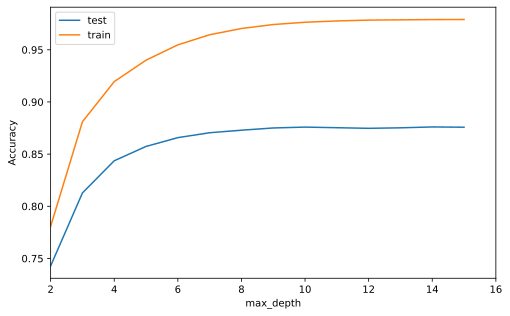

In [45]:
rcParams['figure.figsize'] = 8, 5
plt.plot(max_depth_list,accuracy_test)
plt.plot(max_depth_list,accuracy_train)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['test','train'])
plt.xlim(2,16)



In [ ]:
### Вывод
Модель обученная с помошью RandomForestRegressor с глубеной 11 показывает результат лучше чем модель обученная 
с помошью линейной регресии. Но как показывает график  RandomForestRegressor с увилечением глубины показывает 
такой же для релультат для тестовых даннх, а результат с тренировочми данными стремится к еденице. 
Показывает переобучаемость модели. Лучше всего использовать глубину не более 7 

In [47]:
clf = RandomForestRegressor(max_depth=7, n_estimators=1000, random_state=42)
clf.fit(X_train, y_train.values[:,0])
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
r2_score(y_test, y_pred)

0.8704995380141185

max_depth =11

0.87472606157312

In [48]:
?RandomForestRegressor